In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
df = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
X_test = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_test.csv')
y_test = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/sample_submission.csv')

# Data Analysys

Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.shape

(19158, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Most of the attributes of the object type

Let's check the numerical data types

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [7]:
df_num = df.select_dtypes(exclude=['object'])    

### num columns

#### target

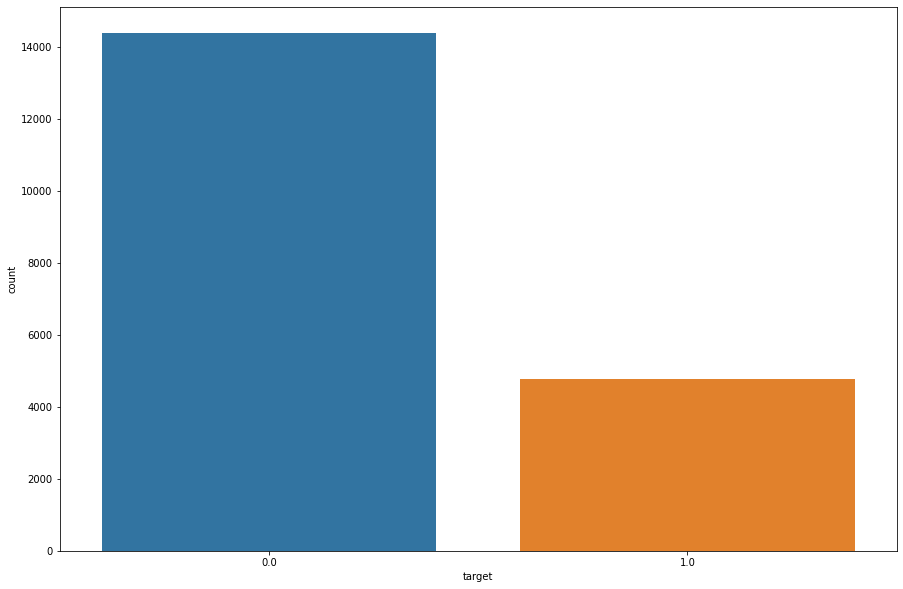

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_num, x='target');

In [9]:
round(df_num['target'].value_counts(normalize=True)*100)

0.0    75.0
1.0    25.0
Name: target, dtype: float64

There is a strong imbalance of the target attribute 1:4

#####  enrollee_id

In [10]:
df_num['enrollee_id'].nunique() == df_num['enrollee_id'].count()

True

enrollee_id does not have duplicate ids, so it does not carry any semantic load, except for the candidate index, which should have been used as the index of the dataset, but I will not do it now

##### city_development_index

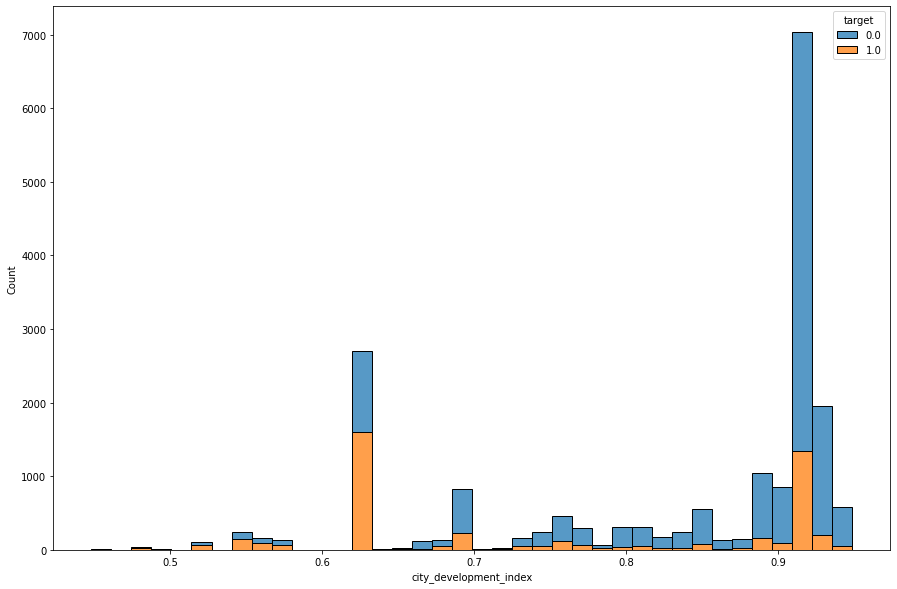

In [11]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_num, x='city_development_index', hue='target', multiple="stack");

target = 1 is more common in city_development_index < 0.65

#### training_hours

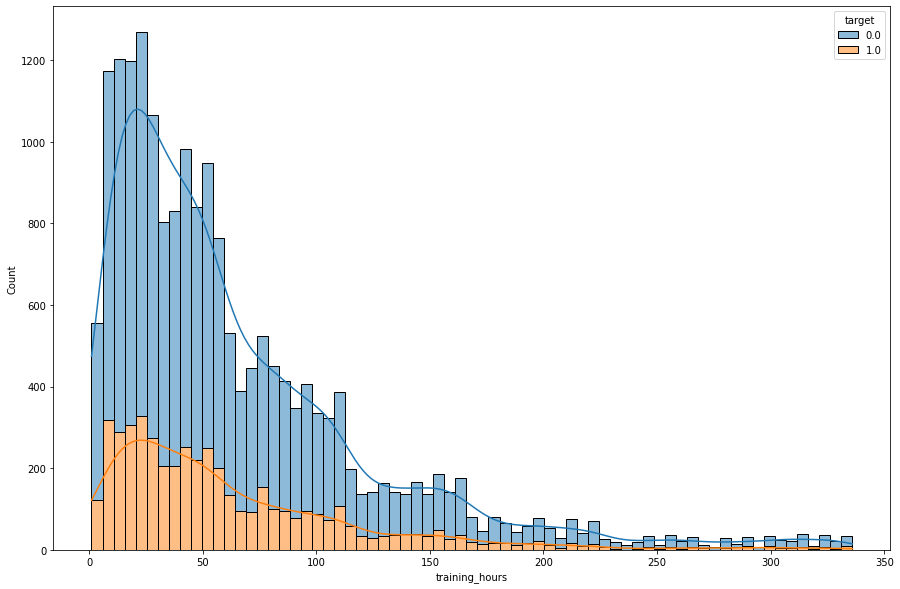

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_num, x='training_hours', hue='target', multiple="stack", kde=True);

Less than 200 candidates studied for more than 110 hours

Due to the target imbalance, it can be assumed that the target attribute is distributed equally and training_hours does not have a strong influence

### object columns

In [13]:
df.describe(include=['object']).T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [14]:
df.select_dtypes(include=['object'])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2


In [15]:
df_object = df.drop(['city_development_index', 'training_hours', 'enrollee_id'],axis = 1)

#### city

In [16]:
check_city = df_object['city'].value_counts().head(10)
check_city

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
Name: city, dtype: int64

<AxesSubplot:ylabel='city'>

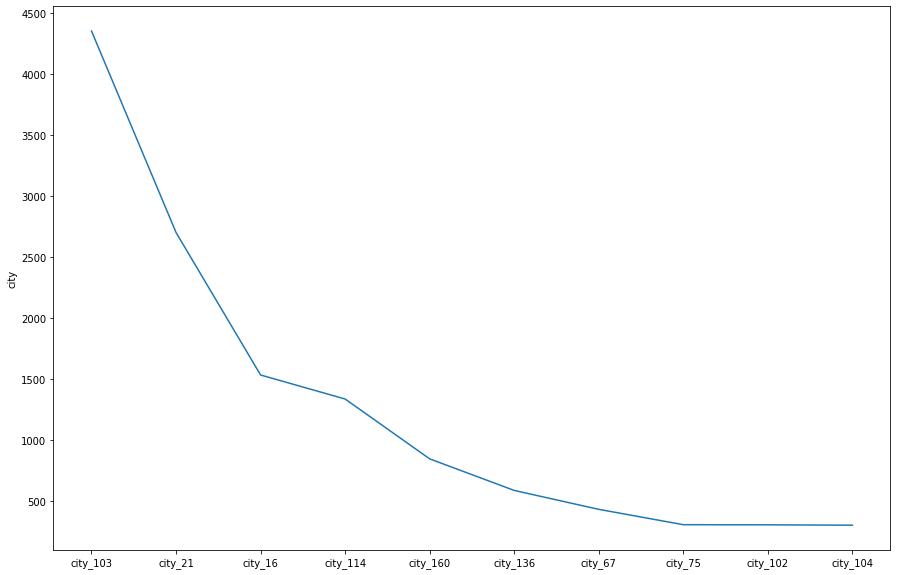

In [17]:
plt.figure(figsize=(15,10))
sns.lineplot(data=check_city)

Most of the candidates are from 7 major cities

In [18]:
df_object['city_n'] = df['city'].apply(lambda x: int(x.replace('city_','')))

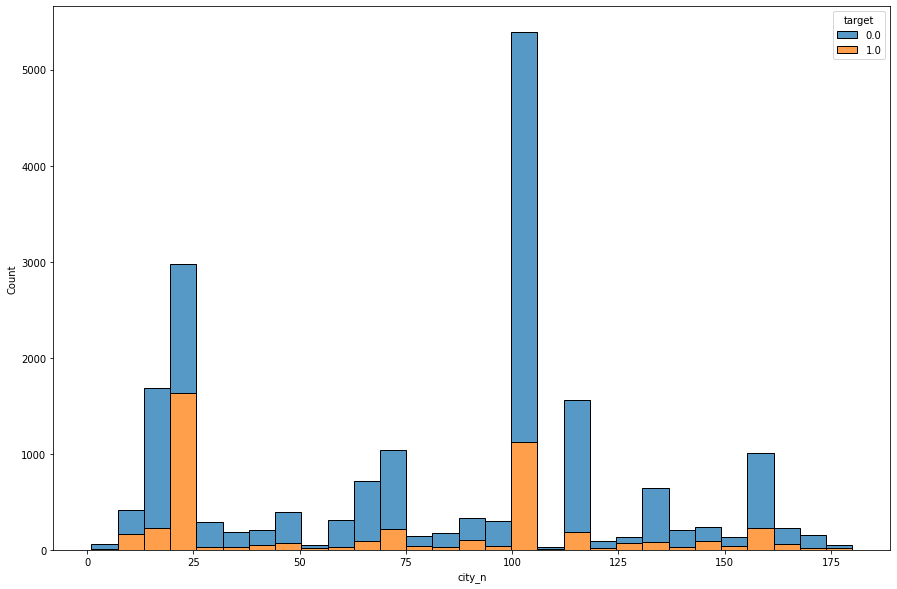

In [19]:
plt.figure(figsize=(15,10))
sns.histplot(x=df_object.city_n ,hue=df_object.target, multiple="stack");

#### gender

In [20]:
df_object['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

The gender variable has NaN and 3 categories

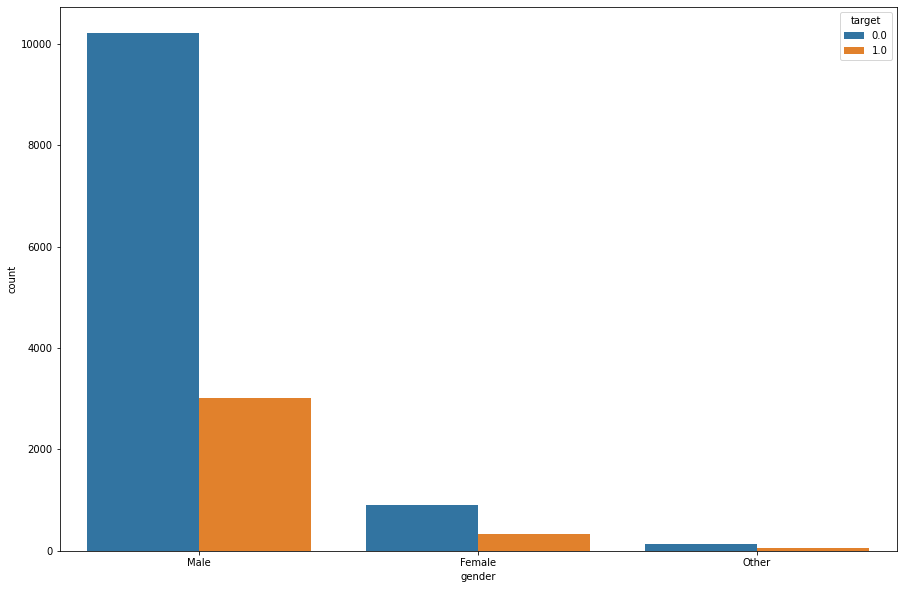

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data =df_object, x='gender', hue='target');

Male objects are observed much more than the rest

#### relevent_experience

In [22]:
df_object['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

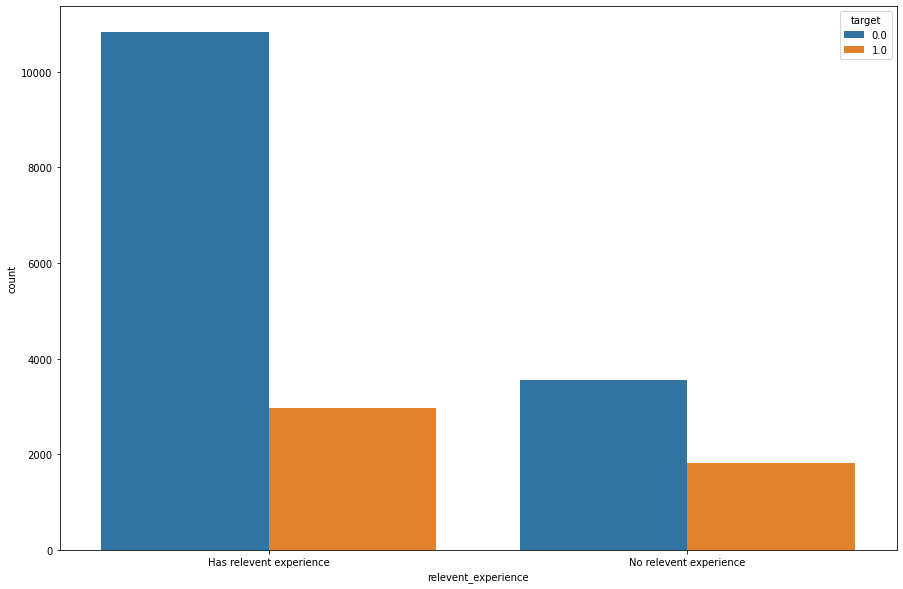

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(x=df_object.relevent_experience, hue=df_object.target);

People with the relevent experience are more likely to be looking for a job

#### enrolled_university

In [24]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

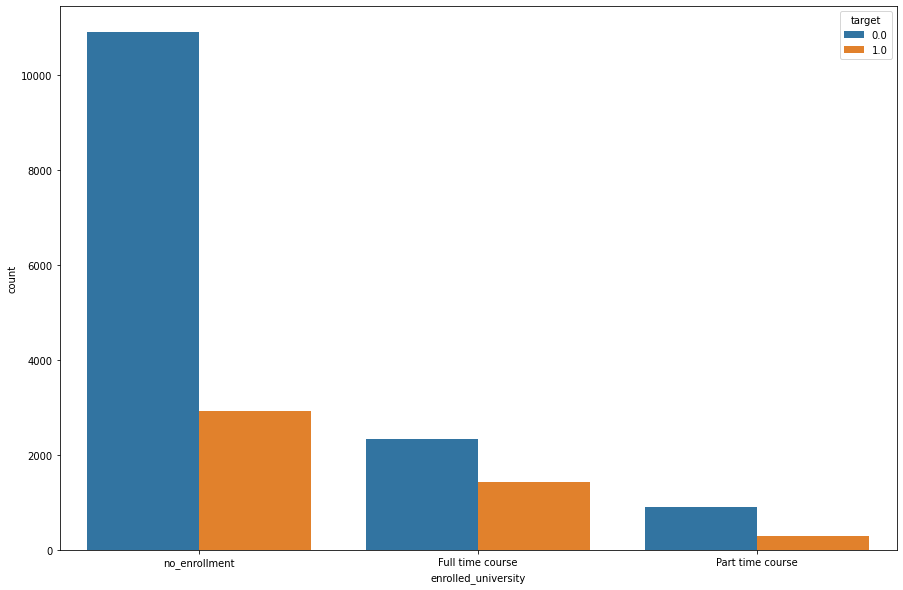

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_object, x='enrolled_university', hue='target');

Candidates who have completed full time course are more likely to look for a new job

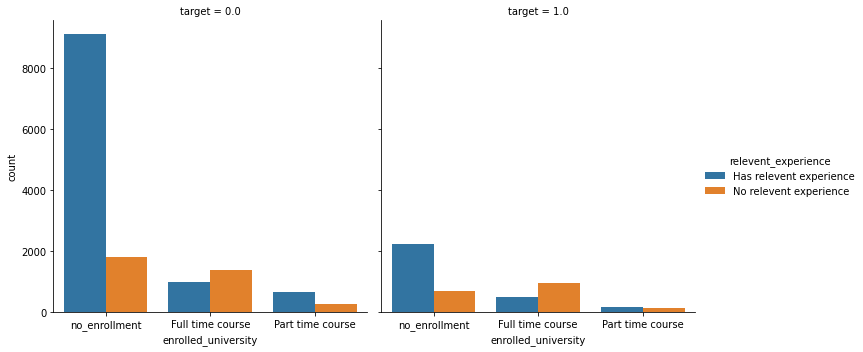

In [26]:
sns.catplot(data=df_object, x='enrolled_university', hue='relevent_experience', col='target', kind='count', height=5);

Candidates who have no relevent experience but have completed full-time course are more likely to look for a job than candidates who have relevent experience and have completed full-time course

#### education_level

In [27]:
df_object['education_level'].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

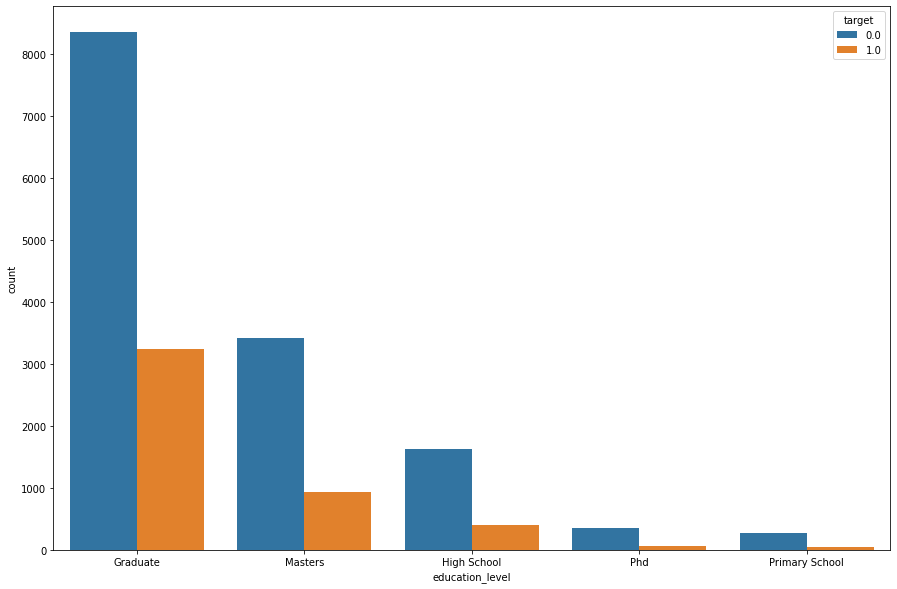

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_object, x='education_level', hue='target');

A natural situation, Graduate are most often in search of work

#### major_discipline

In [29]:
df_object['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

Most of the candidates in the sample with the STEM 

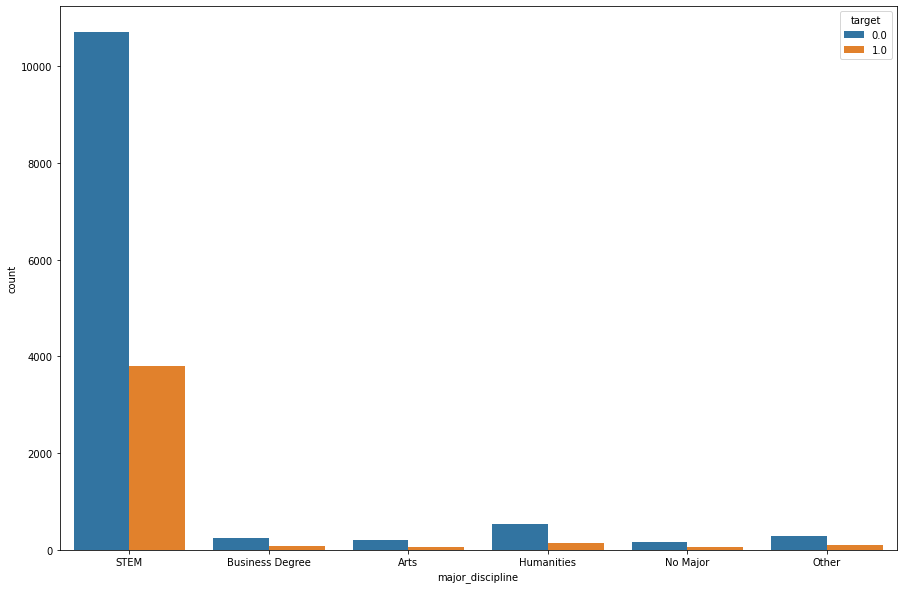

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_object, x='major_discipline', hue='target');

#### experience     

In [31]:
print('unique values:', *df_object['experience'].unique(),'\n\n count unique values:', df_object['experience'].nunique())

unique values: >20 15 5 <1 11 13 7 17 2 16 1 4 10 14 18 19 12 3 6 9 8 20 nan 

 count unique values: 22


In [32]:
df_object['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

Candidates who have worked for more than 20 years are most often found in the sample

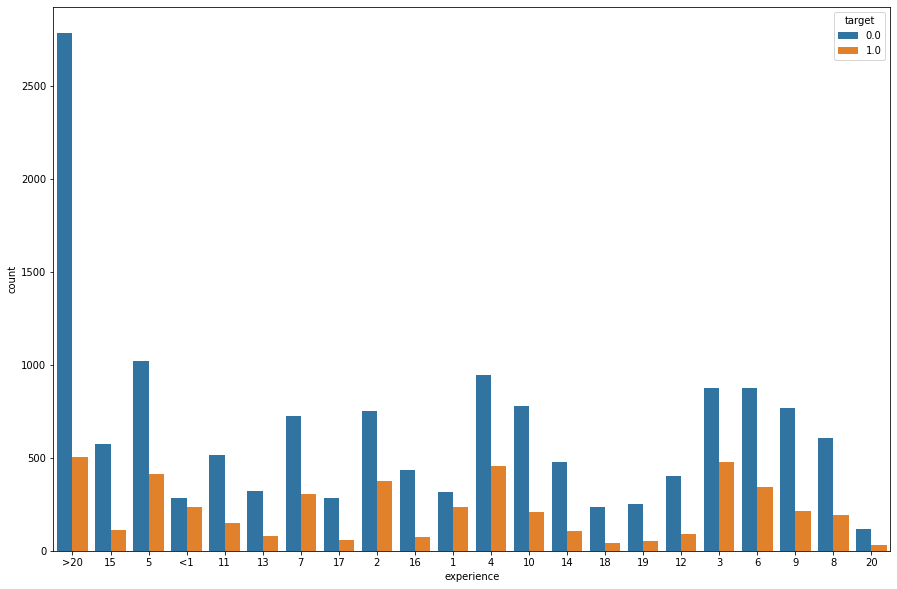

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_object, x='experience', hue='target');

Candidates with experience = (2;4) are most often looking for a new job

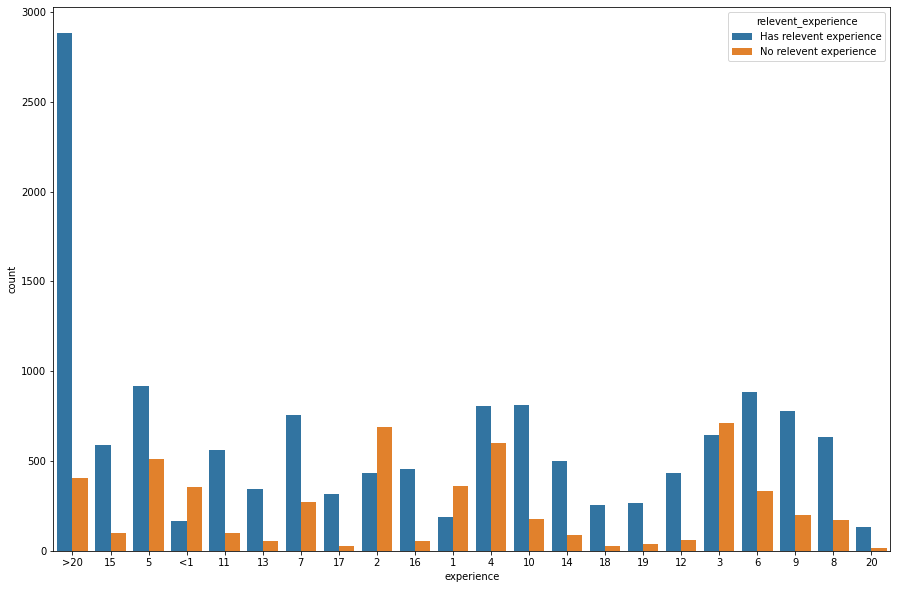

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_object, x='experience', hue='relevent_experience');

At first I thought that having experience, we don't need relevant_experience, since they repeat each other, but no. Apparently, experience implies the GENERAL experience of the candidate, and not the experience in the field of search

#### company_size

In [35]:
df_object['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

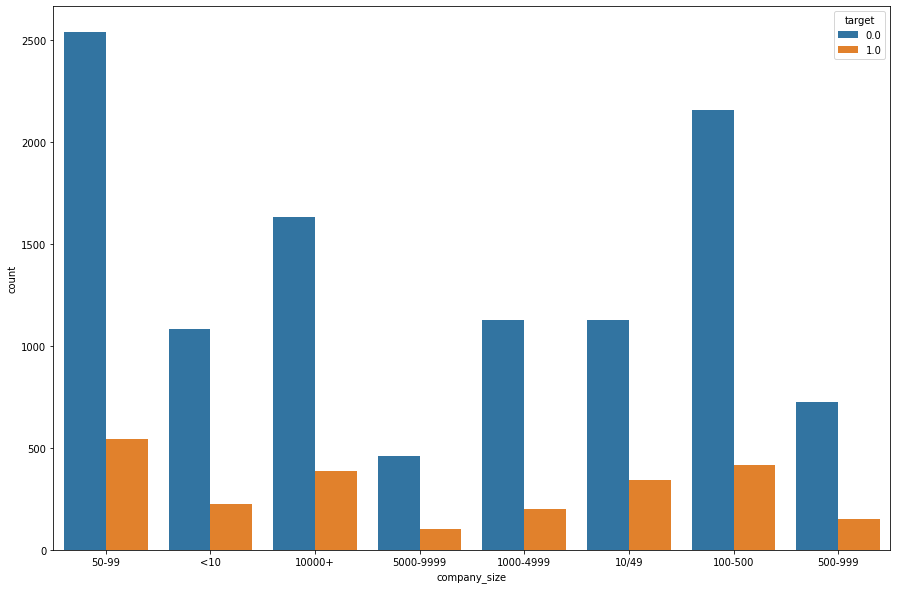

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_object, x='company_size', hue='target');

The size of the company doesn't seem to have much effect on the target variable

#### company_type

In [37]:
df_object['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

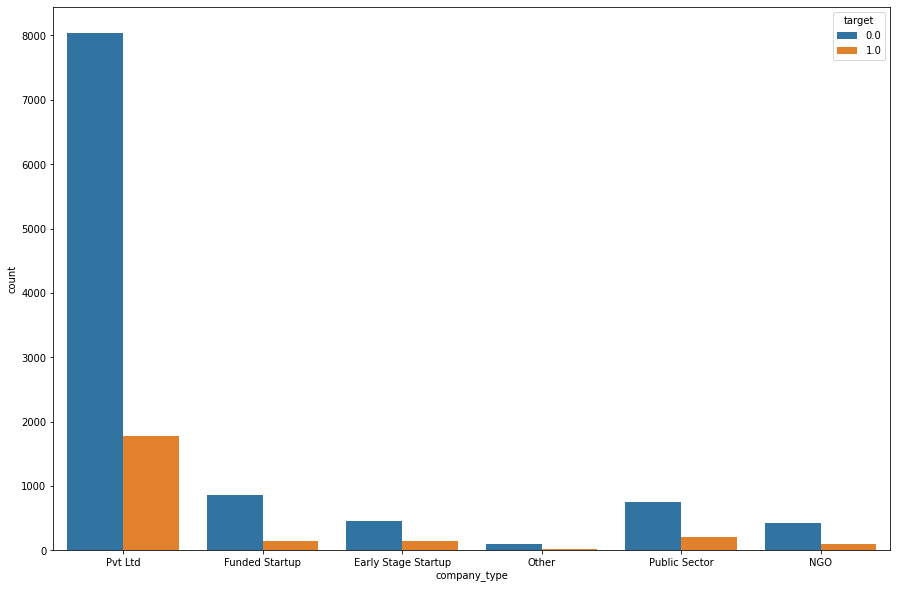

In [38]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_object, x='company_type', hue='target');

The type of company doesn't seem to have much effect on the target variable

#### last new job

In [39]:
df_object['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

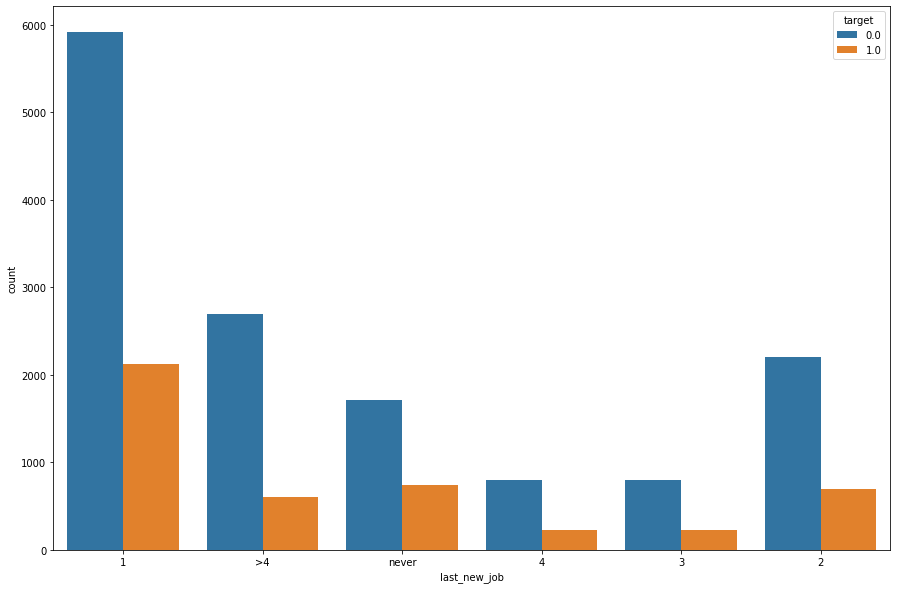

In [40]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_object, x='last_new_job', hue='target');

Most often, people are looking for a job with little or no work experience at all

#### corr map

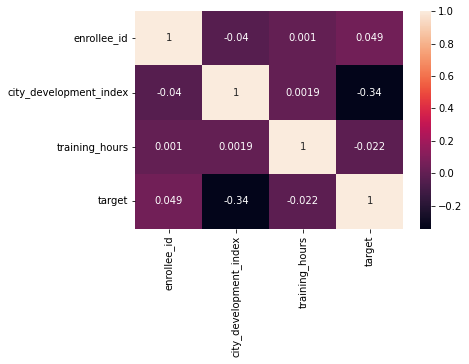

In [41]:
sns.heatmap(df.corr(), annot=True);

For nominative variables, we can build a correlation table and see that city_development_index correlates slightly with the target attribute

# Preprocessing

### Fill missing values

Fill in all the gaps in accordance with the proportion of the division of the attribute

In [42]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [43]:
X_test.isna().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

#### gender

In [44]:
df['gender'].value_counts(normalize=True)

Male      0.902457
Female    0.084505
Other     0.013038
Name: gender, dtype: float64

In [45]:
X_test['gender'].value_counts(normalize=True)

Male      0.900679
Female    0.084516
Other     0.014806
Name: gender, dtype: float64

In [46]:
gender_male = round(df['gender'].isna().sum()*0.9)
gender_female = round(df['gender'].isna().sum()*0.09)
gender_other = round(df['gender'].isna().sum()*0.01)

In [47]:
df['gender'].fillna('Male', limit=gender_male, inplace=True)
df['gender'].fillna('Female', limit=gender_female, inplace=True)
df['gender'].fillna('Other', limit=gender_other, inplace=True)

In [48]:
X_test['gender'].fillna('Male', limit=gender_male, inplace=True)
X_test['gender'].fillna('Female', limit=gender_female, inplace=True)
X_test['gender'].fillna('Other', limit=gender_other, inplace=True)

In [49]:
df['gender'].isna().sum()

0

In [50]:
X_test['gender'].isna().sum()

0

#### enrolled_university

In [51]:
df['enrolled_university'].value_counts(normalize=True)

no_enrollment       0.736043
Full time course    0.200139
Part time course    0.063818
Name: enrolled_university, dtype: float64

In [52]:
X_test['enrolled_university'].value_counts(normalize=True)

no_enrollment       0.724023
Full time course    0.207340
Part time course    0.068637
Name: enrolled_university, dtype: float64

In [53]:
enrolled_university_no = round(df['enrolled_university'].isna().sum()*0.74)
enrolled_university_full = round(df['enrolled_university'].isna().sum()*0.2)
enrolled_university_part = round(df['enrolled_university'].isna().sum()*0.6)

In [54]:
df['enrolled_university'].fillna('no_enrollment', limit=enrolled_university_no, inplace=True)
df['enrolled_university'].fillna('Full time course', limit=enrolled_university_full, inplace=True)
df['enrolled_university'].fillna('Part time course', limit=enrolled_university_part, inplace=True)

In [55]:
X_test['enrolled_university'].fillna('no_enrollment', limit=enrolled_university_no, inplace=True)
X_test['enrolled_university'].fillna('Full time course', limit=enrolled_university_full, inplace=True)
X_test['enrolled_university'].fillna('Part time course', limit=enrolled_university_part, inplace=True)

In [56]:
df['enrolled_university'].isna().sum()

0

In [57]:
X_test['enrolled_university'].isna().sum()

0

#### education_level

In [58]:
df['education_level'].value_counts(normalize=True)

Graduate          0.620280
Masters           0.233234
High School       0.107872
Phd               0.022141
Primary School    0.016472
Name: education_level, dtype: float64

In [59]:
X_test['education_level'].value_counts(normalize=True)

Graduate          0.610977
Masters           0.238806
High School       0.106885
Phd               0.025999
Primary School    0.017333
Name: education_level, dtype: float64

In [60]:
education_grad = round(df['education_level'].isna().sum()*0.62)
education_master = round(df['education_level'].isna().sum()*0.24)
education_high = round(df['education_level'].isna().sum()*0.11)
education_phd = round(df['education_level'].isna().sum()*0.02)
education_primary = round(df['education_level'].isna().sum()*0.02)

In [61]:
df['education_level'].fillna('Graduate', limit=education_grad, inplace=True)
df['education_level'].fillna('Masters', limit=education_master, inplace=True)
df['education_level'].fillna('High School', limit=education_high, inplace=True)
df['education_level'].fillna('Phd', limit=education_phd, inplace=True)
df['education_level'].fillna('Primary School', limit=education_primary, inplace=True)

In [62]:
X_test['education_level'].fillna('Graduate', limit=education_grad, inplace=True)
X_test['education_level'].fillna('Masters', limit=education_master, inplace=True)
X_test['education_level'].fillna('High School', limit=education_high, inplace=True)
X_test['education_level'].fillna('Phd', limit=education_phd, inplace=True)
X_test['education_level'].fillna('Primary School', limit=education_primary, inplace=True)

In [63]:
df['education_level'].isna().sum()

0

In [64]:
X_test['education_level'].isna().sum()

0

#### major_discipline

In [65]:
df['major_discipline'].value_counts(normalize=True)

STEM               0.886632
Humanities         0.040930
Other              0.023310
Business Degree    0.020006
Arts               0.015479
No Major           0.013643
Name: major_discipline, dtype: float64

In [66]:
X_test['major_discipline'].value_counts(normalize=True)

STEM               0.892130
Humanities         0.044029
Other              0.022014
Business Degree    0.020363
No Major           0.012108
Arts               0.009356
Name: major_discipline, dtype: float64

In [67]:
major_stem = round(df['major_discipline'].isna().sum()*0.89)
major_human = round(df['major_discipline'].isna().sum()*0.04)
major_other = round(df['major_discipline'].isna().sum()*0.024)
major_business = round(df['major_discipline'].isna().sum()*0.02)
major_arts = round(df['major_discipline'].isna().sum()*0.016)
major_no = round(df['major_discipline'].isna().sum()*0.014)

In [68]:
df['major_discipline'].fillna('STEM', limit=major_stem, inplace=True)
df['major_discipline'].fillna('Humanities', limit=major_human, inplace=True)
df['major_discipline'].fillna('Other', limit=major_other, inplace=True)
df['major_discipline'].fillna('Business Degree', limit=major_business, inplace=True)
df['major_discipline'].fillna('Arts', limit=major_arts, inplace=True)
df['major_discipline'].fillna('No Major', limit=major_no, inplace=True)

In [69]:
X_test['major_discipline'].fillna('STEM', limit=major_stem, inplace=True)
X_test['major_discipline'].fillna('Humanities', limit=major_human, inplace=True)
X_test['major_discipline'].fillna('Other', limit=major_other, inplace=True)
X_test['major_discipline'].fillna('Business Degree', limit=major_business, inplace=True)
X_test['major_discipline'].fillna('Arts', limit=major_arts, inplace=True)
X_test['major_discipline'].fillna('No Major', limit=major_no, inplace=True)

In [70]:
df['major_discipline'].isna().sum()

0

In [71]:
X_test['major_discipline'].isna().sum()

0

#### experience

In [72]:
df['experience'].value_counts(normalize=True)

>20    0.172105
5      0.074897
4      0.073482
3      0.070916
6      0.063688
2      0.059027
7      0.053842
10     0.051590
9      0.051328
8      0.042005
15     0.035929
11     0.034777
14     0.030692
1      0.028754
<1     0.027340
16     0.026607
12     0.025873
13     0.020898
17     0.017912
19     0.015922
18     0.014665
20     0.007752
Name: experience, dtype: float64

In [73]:
X_test['experience'].value_counts(normalize=True)

>20    0.180320
5      0.076742
3      0.072505
4      0.068267
6      0.061205
2      0.060264
7      0.054614
9      0.053202
10     0.045198
11     0.040490
8      0.038606
<1     0.034840
16     0.032015
15     0.027778
1      0.026365
14     0.025895
13     0.025424
12     0.024482
17     0.016949
19     0.013653
18     0.012241
20     0.008945
Name: experience, dtype: float64

In [74]:
experience_m20 = round(df['experience'].isna().sum()*0.64)
experience_5 = round(df['experience'].isna().sum()*0.13)
experience_4 = round(df['experience'].isna().sum()*0.12)
experience_3 = round(df['experience'].isna().sum()*0.11)

There are few passes, so we will distribute them among the 4 most popular

In [75]:
df['experience'].fillna('>20', limit=experience_m20, inplace=True)
df['experience'].fillna('5', limit=experience_5, inplace=True)
df['experience'].fillna('4', limit=experience_4, inplace=True)
df['experience'].fillna('3', limit=experience_3, inplace=True)

In [76]:
X_test['experience'].fillna('>20', limit=experience_m20, inplace=True)
X_test['experience'].fillna('5', limit=experience_5, inplace=True)
X_test['experience'].fillna('4', limit=experience_4, inplace=True)
X_test['experience'].fillna('3', limit=experience_3, inplace=True)

In [77]:
df['experience'].isna().sum()

0

In [78]:
X_test['experience'].isna().sum()

0

#### company_size

In [79]:
df['company_size'].value_counts(normalize=True)

50-99        0.233207
100-500      0.194478
10000+       0.152723
10/49        0.111271
1000-4999    0.100454
<10          0.098941
500-999      0.066339
5000-9999    0.042587
Name: company_size, dtype: float64

In [80]:
X_test['company_size'].value_counts(normalize=True)

50-99        0.224287
100-500      0.211015
10000+       0.143995
10/49        0.114134
<10          0.108162
1000-4999    0.094891
500-999      0.058394
5000-9999    0.045123
Name: company_size, dtype: float64

In [81]:
size_50_99 = round(df['company_size'].isna().sum()*0.24)
size_100_500 = round(df['company_size'].isna().sum()*0.2)
size_more = round(df['company_size'].isna().sum()*0.15)
size_10_49 = round(df['company_size'].isna().sum()*0.1)
size_1000_4999 = round(df['company_size'].isna().sum()*0.1)
size_l10 = round(df['company_size'].isna().sum()*0.1)
size_500_999 = round(df['company_size'].isna().sum()*0.07)
size_5000_9999 = round(df['company_size'].isna().sum()*0.04)

In [82]:
df['company_size'].fillna('50-99', limit=size_50_99, inplace=True)
df['company_size'].fillna('100-500', limit=size_100_500, inplace=True)
df['company_size'].fillna('10000+', limit=size_more, inplace=True)
df['company_size'].fillna('10/49', limit=size_10_49, inplace=True)
df['company_size'].fillna('1000-4999', limit=size_1000_4999, inplace=True)
df['company_size'].fillna('<10', limit=size_l10, inplace=True)
df['company_size'].fillna('500-999', limit=size_500_999, inplace=True)
df['company_size'].fillna('5000-9999', limit=size_5000_9999, inplace=True)

In [83]:
X_test['company_size'].fillna('50-99', limit=size_50_99, inplace=True)
X_test['company_size'].fillna('100-500', limit=size_100_500, inplace=True)
X_test['company_size'].fillna('10000+', limit=size_more, inplace=True)
X_test['company_size'].fillna('10/49', limit=size_10_49, inplace=True)
X_test['company_size'].fillna('1000-4999', limit=size_1000_4999, inplace=True)
X_test['company_size'].fillna('<10', limit=size_l10, inplace=True)
X_test['company_size'].fillna('500-999', limit=size_500_999, inplace=True)
X_test['company_size'].fillna('5000-9999', limit=size_5000_9999, inplace=True)

In [84]:
df['company_size'].isna().sum()

0

In [85]:
X_test['company_size'].isna().sum()

0

#### company_type

In [86]:
df['company_type'].value_counts(normalize=True)

Pvt Ltd                0.754110
Funded Startup         0.076894
Public Sector          0.073360
Early Stage Startup    0.046320
NGO                    0.040022
Other                  0.009295
Name: company_type, dtype: float64

In [87]:
X_test['company_type'].value_counts(normalize=True)

Pvt Ltd                0.763211
Public Sector          0.084950
Funded Startup         0.064883
Early Stage Startup    0.043478
NGO                    0.035452
Other                  0.008027
Name: company_type, dtype: float64

In [88]:
type_pvt = round(df['company_type'].isna().sum()*0.76)
type_funded = round(df['company_type'].isna().sum()*0.08)
type_public = round(df['company_type'].isna().sum()*0.07)
type_early = round(df['company_type'].isna().sum()*0.05)
type_ngo = round(df['company_type'].isna().sum()*0.04)
type_other = round(df['company_type'].isna().sum()*0.001)

In [89]:
df['company_type'].fillna('Pvt Ltd', limit=type_pvt, inplace=True)
df['company_type'].fillna('Funded Startup', limit=type_funded, inplace=True)
df['company_type'].fillna('Public Sector', limit=type_public, inplace=True)
df['company_type'].fillna('Early Stage Startup', limit=type_early, inplace=True)
df['company_type'].fillna('NGO', limit=type_ngo, inplace=True)
df['company_type'].fillna('Other', limit=type_other, inplace=True)

In [90]:
X_test['company_type'].fillna('Pvt Ltd', limit=type_pvt, inplace=True)
X_test['company_type'].fillna('Funded Startup', limit=type_funded, inplace=True)
X_test['company_type'].fillna('Public Sector', limit=type_public, inplace=True)
X_test['company_type'].fillna('Early Stage Startup', limit=type_early, inplace=True)
X_test['company_type'].fillna('NGO', limit=type_ngo, inplace=True)
X_test['company_type'].fillna('Other', limit=type_other, inplace=True)

In [91]:
df['company_type'].isna().sum()

0

In [92]:
X_test['company_type'].isna().sum()

0

#### last_new_job

In [93]:
df['last_new_job'].value_counts(normalize=True)

1        0.429143
>4       0.175607
2        0.154790
never    0.130878
4        0.054924
3        0.054657
Name: last_new_job, dtype: float64

In [94]:
X_test['last_new_job'].value_counts(normalize=True)

1        0.423169
>4       0.168980
2        0.163715
never    0.123504
3        0.063667
4        0.056965
Name: last_new_job, dtype: float64

In [95]:
job_1 = round(df['last_new_job'].isna().sum()*0.43)
job_l4 = round(df['last_new_job'].isna().sum()*0.18)
job_2 = round(df['last_new_job'].isna().sum()*0.16)
job_never = round(df['last_new_job'].isna().sum()*0.13)
job_4 = round(df['last_new_job'].isna().sum()*0.06)
job_3 = round(df['last_new_job'].isna().sum()*0.06)

In [96]:
df['last_new_job'].fillna('1', limit=job_1, inplace=True)
df['last_new_job'].fillna('>4', limit=job_l4, inplace=True)
df['last_new_job'].fillna('2', limit=job_2, inplace=True)
df['last_new_job'].fillna('never', limit=job_never, inplace=True)
df['last_new_job'].fillna('4', limit=job_4, inplace=True)
df['last_new_job'].fillna('3', limit=job_3, inplace=True)

In [97]:
X_test['last_new_job'].fillna('1', limit=job_1, inplace=True)
X_test['last_new_job'].fillna('>4', limit=job_l4, inplace=True)
X_test['last_new_job'].fillna('2', limit=job_2, inplace=True)
X_test['last_new_job'].fillna('never', limit=job_never, inplace=True)
X_test['last_new_job'].fillna('4', limit=job_4, inplace=True)
X_test['last_new_job'].fillna('3', limit=job_3, inplace=True)

In [98]:
df['last_new_job'].isna().sum()

0

In [99]:
X_test['last_new_job'].isna().sum()

0

----------------------------------

In [100]:
df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [101]:
X_test.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

### Encoding

In this paper, I will not use linear models, so Label encoding should not greatly affect the result.

But I won't use Label Encoding() because it might encode some extra variables or encode them the wrong way I want, so I'll do it manually

Before encoding, I will perform the necessary operations with the dataset

In [102]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


We will delete the enrollee_id column, since it does not represent any use other than the candidate id

Replace city with the city_n column containing only the number of the city

Replace the target type with int

In [103]:
df.drop(['enrollee_id'],axis=1, inplace=True)
df['city'] = df_object['city_n']
df['target'] = df['target'].apply(lambda x: int(x))

In [104]:
X_test.drop(['enrollee_id'], axis=1, inplace=True)
X_test['city'] = X_test['city'].apply(lambda x: x.replace('city_','')).apply(lambda x: int(x))

Let's create dictionaries with replaceable values for all object variables

In [105]:
gender_encod= {'Male':2,
              'Female':1,
              'Other':0}

relevent_experience_encod = {'Has relevent experience':1,
                            'No relevent experience':0}
enrolled_university_encod = {'no_enrollment':0,
                            'Part time course':1,
                            'Full time course':2}

education_level_encod = {'Primary School':0,
                        'High School':1,
                        'Graduate':2,
                        'Masters':3,
                        'Phd':4}

major_discipline_encod = {'STEM':5,
                         'Business Degree':4,
                         'Arts':3,
                        'Humanities':2,
                         'No Major':1,
                         'Other':0}

last_job_encod = {'never':0,
                 '1':1,
                 '2':2,
                 '3':3,
                 '4':4,
                 '>4':5}

company_size_encod = {'<10':0,
                     '10/49':1,
                     '50-99':2,
                     '100-500':3,
                     '500-999':4,
                     '1000-4999':5,
                     '5000-9999':6,
                     '10000+':7}

company_type_encod = {'Pvt Ltd':5,
                     'Funded Startup':4,
                     'Early Stage Startup':3,
                     'Public Sector':2,
                     'NGO':1,
                     'Other':0}

experience_encod = {'<1':0,
                    '1':1,
                    '2':2,
                    '3':3,
                    '4':4,
                    '5':5,
                    '6':6,
                    '7':7,
                    '8':8,
                    '9':9,
                    '10':10,
                    '11':11,
                    '12':12,
                    '13':13,
                    '14':14,
                    '15':15,
                    '16':16,
                    '17':17,
                    '18':18,
                    '19':19,
                    '20':20,
                    '>20': 21} 

In [106]:
df['gender'] = df['gender'].map(gender_encod)
df['relevent_experience'] = df['relevent_experience'].map(relevent_experience_encod)
df['enrolled_university'] = df['enrolled_university'].map(enrolled_university_encod)
df['education_level'] = df['education_level'].map(education_level_encod)
df['major_discipline'] = df['major_discipline'].map(major_discipline_encod)
df['experience'] = df['experience'].map(experience_encod)
df['company_size'] = df['company_size'].map(company_size_encod)
df['company_type'] = df['company_type'].map(company_type_encod)
df['last_new_job'] = df['last_new_job'].map(last_job_encod)

In [107]:
X_test['gender'] = X_test['gender'].map(gender_encod)
X_test['relevent_experience'] = X_test['relevent_experience'].map(relevent_experience_encod)
X_test['enrolled_university'] = X_test['enrolled_university'].map(enrolled_university_encod)
X_test['education_level'] = X_test['education_level'].map(education_level_encod)
X_test['major_discipline'] = X_test['major_discipline'].map(major_discipline_encod)
X_test['experience'] = X_test['experience'].map(experience_encod)
X_test['company_size'] = X_test['company_size'].map(company_size_encod)
X_test['company_type'] = X_test['company_type'].map(company_type_encod)
X_test['last_new_job'] = X_test['last_new_job'].map(last_job_encod)

In [108]:
df.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,2,1,0,2,5,21,2,5,1,36,1
1,40,0.776,2,0,0,2,5,15,2,5,5,47,0
2,21,0.624,2,0,2,2,5,5,2,5,0,83,0
3,115,0.789,2,0,0,2,4,0,2,5,0,52,1
4,162,0.767,2,1,0,3,5,21,2,4,4,8,0


In [109]:
X_test.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,41,0.827,2,1,2,2,5,9,0,5,1,21
1,103,0.920,1,1,0,2,5,5,2,5,1,98
2,21,0.624,2,0,0,1,5,0,2,5,0,15
3,13,0.827,2,1,0,3,5,11,1,5,1,39
4,103,0.920,2,1,0,2,5,21,7,5,5,72


Now I can look at the correlation matrix of objects and estimate which independent variables correlate

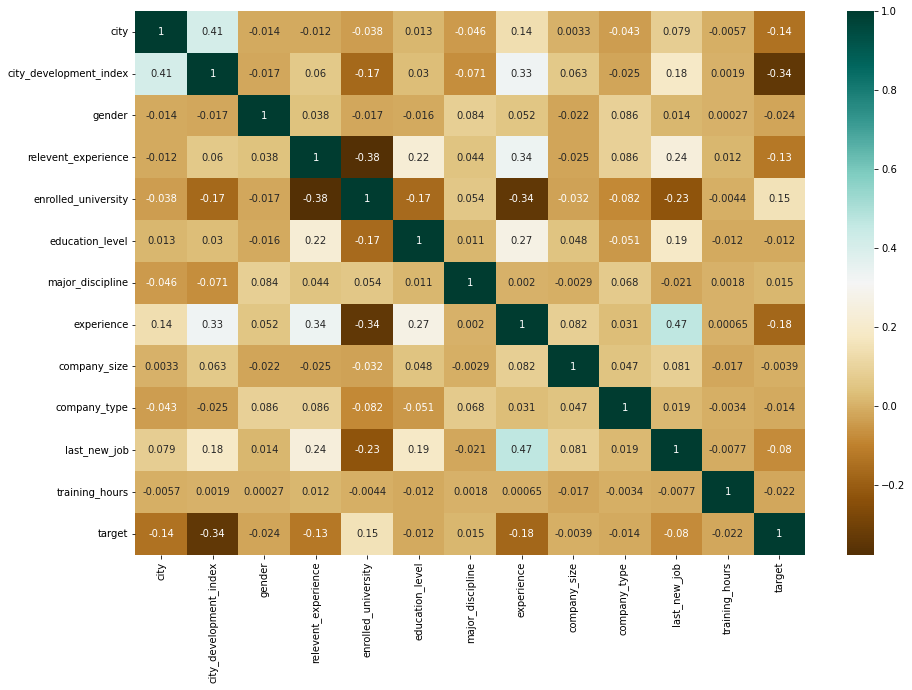

In [110]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='BrBG');

None of the variables correlates strongly with the target

---------------------------------

### Train/Test split

This dataset is already split into Train and Test split, there is no need to do it manually, you also need to remember that the target class is not balanced

In [111]:
X_train = df.drop(['target'], axis=1)
y_train = df.target
y_test = y_test.target

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19158, 12), (2129, 12), (19158,), (2129,))

In [113]:
y_test

0       0.5
1       0.5
2       0.5
3       0.5
4       0.5
       ... 
2124    0.5
2125    0.5
2126    0.5
2127    0.5
2128    0.5
Name: target, Length: 2129, dtype: float64

Okay, I do not know what it is and why y_test, which was downloaded from Kaggle, looks like this, but in the comments I found a man, his nickname is Möbius, he provided y_test for this dataset, for which he is very grateful!

https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/discussion/206474


In [114]:
y_test = np.load('../input/job-change-dataset-answer/jobchange_test_target_values.npy')

In [115]:
y_test.shape

(2129,)

Since I will use only a Decision Tree and a Random Forest, I don't need to scaling my data, so we can start training models.

# Machine Learning

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold, cross_val_score

In [117]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree

In [118]:
def roc_curve_plot(y_test, y_pred):
    fpr, tpr,_ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

## Decision Tree baseline

In [119]:
tree_clf = DecisionTreeClassifier(random_state=17)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [120]:
tree_pred = tree_clf.predict(X_test)
tree_pred_proba = tree_clf.predict_proba(X_test)[:,1]

In [121]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1553
         1.0       0.43      0.42      0.42       576

    accuracy                           0.69      2129
   macro avg       0.61      0.60      0.61      2129
weighted avg       0.69      0.69      0.69      2129



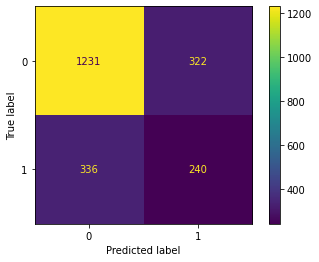

In [122]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, tree_pred)).plot();

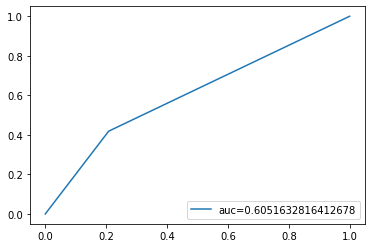

In [123]:
roc_curve_plot(y_test, tree_pred_proba)

In [124]:
print('Train:', tree_clf.score(X_train, y_train),'\nTest: ',tree_clf.score(X_test, y_test))

Train: 0.9987472596304416 
Test:  0.6909347111319869


We see that the model is very much retrained

#### Learning curve

In [125]:
from sklearn.model_selection import learning_curve

In [126]:
def plot_learning_curve(estimator, X, y):
    
    train_sizes, train_score, test_score = learning_curve(
    estimator =  estimator,
    X = X,
    y = y, 
    train_sizes = np.linspace(0.01, 1.0, 50), 
    cv = 5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=17) 
    
    mean_train = np.mean(train_score, axis=1)
    mean_test = np.mean(test_score, axis=1)

    plt.plot(train_sizes, mean_train, '--', color="b",  label="Training score")
    plt.plot(train_sizes, mean_test ,color="g", label="Cross-validation score")

    plt.title('learning curve')
    plt.xlabel("size"),
    plt.ylabel("score"),
    plt.legend(loc="best")
    plt.show()

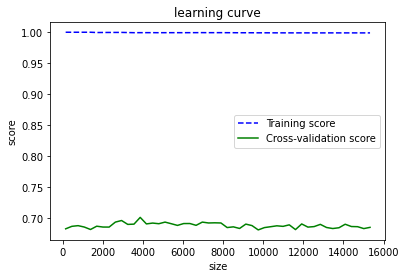

In [127]:
plot_learning_curve(tree_clf, X_train, y_train)

We see a big variation on training and cross-qualification

o begin with, let's try to tuning the hyperparameters of our model

## Hyperparameter Tuning DecisionTree 

In [128]:
tree_param = {'max_depth':range(2,20,2),
             'min_samples_split':range(2, 52, 10),
             'min_samples_leaf':range(2,20,2)
             }
sf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [129]:
rs = RandomizedSearchCV(tree_clf, tree_param, cv=sf, random_state=17, n_jobs=-1, verbose=1)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.8s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                   estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20, 2),
                                        'min_samples_leaf': range(2, 20, 2),
                                        'min_samples_split': range(2, 52, 10)},
                   random_state=17, verbose=1)

In [130]:
rs.best_params_

{'min_samples_split': 22, 'min_samples_leaf': 16, 'max_depth': 4}

In [131]:
best_tree_param = {'min_samples_split': range(15,28,2),
                   'min_samples_leaf': range(12,21),
                   'max_depth': range(3,7)
                  }

In [132]:
gs = GridSearchCV(tree_clf, best_tree_param, cv=sf, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:   12.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(3, 7),
                         'min_samples_leaf': range(12, 21),
                         'min_samples_split': range(15, 28, 2)},
             verbose=1)

In [133]:
best_tree = gs.best_estimator_
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 19, 'min_samples_split': 15}

In [134]:
best_tree_pred = best_tree.predict(X_test)
best_tree_pred_proba = best_tree.predict_proba(X_test)[:,1]

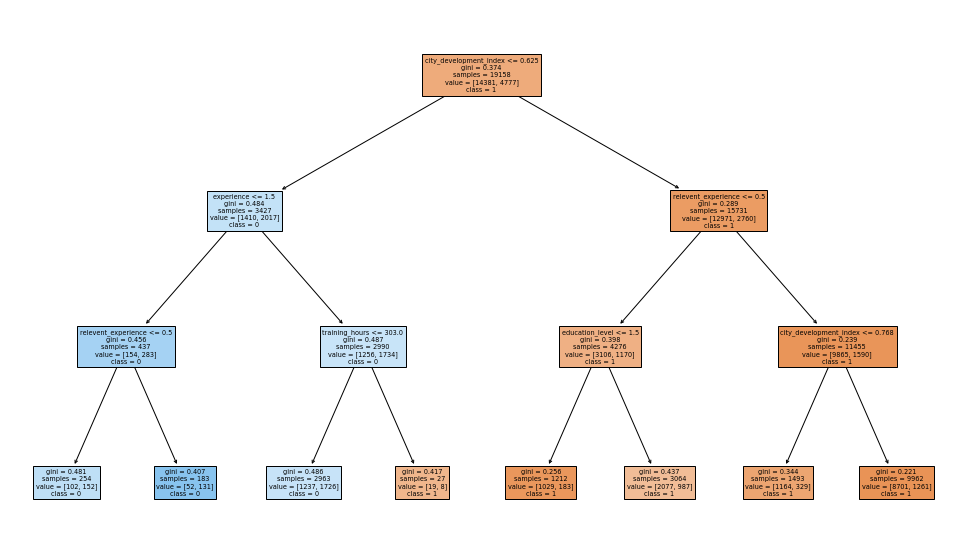

In [135]:
plt.figure(figsize=(17,10))
tree.plot_tree(best_tree, filled=True, class_names=['1','0'], feature_names=X_train.columns);

In [136]:
tree_feature = pd.DataFrame(best_tree.feature_importances_, index=X_train.columns, columns=['result'])
tree_feature

,result
city,0.000000
city_development_index,0.849017
gender,0.000000
relevent_experience,0.100260
enrolled_university,0.000000
education_level,0.043924
major_discipline,0.000000
experience,0.003014
company_size,0.000000
company_type,0.000000


In [137]:
print('Train:', best_tree.score(X_train, y_train),'\nTest: ',best_tree.score(X_test, y_test))

Train: 0.7829105334586074 
Test:  0.778769375293565


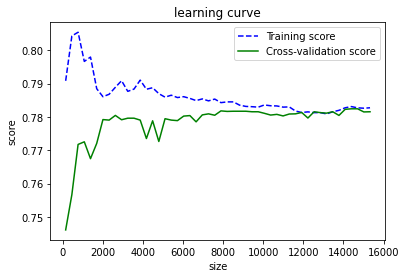

In [138]:
plot_learning_curve(best_tree, X_train, y_train)

overfitting is not visible

In [139]:
print(classification_report(y_test, best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1553
         1.0       0.63      0.44      0.52       576

    accuracy                           0.78      2129
   macro avg       0.72      0.67      0.69      2129
weighted avg       0.76      0.78      0.76      2129



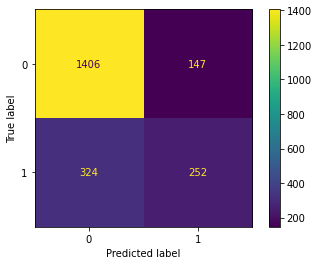

In [140]:
ConfusionMatrixDisplay(confusion_matrix(y_test, best_tree_pred)).plot();

But we still see a preponderance of class 0, compared to 1

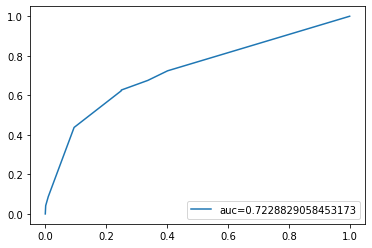

In [141]:
roc_curve_plot(y_test, best_tree_pred_proba)

Let's try to achieve a balance of classes for a better assessment

## Resampling Unbalanced class

In [142]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

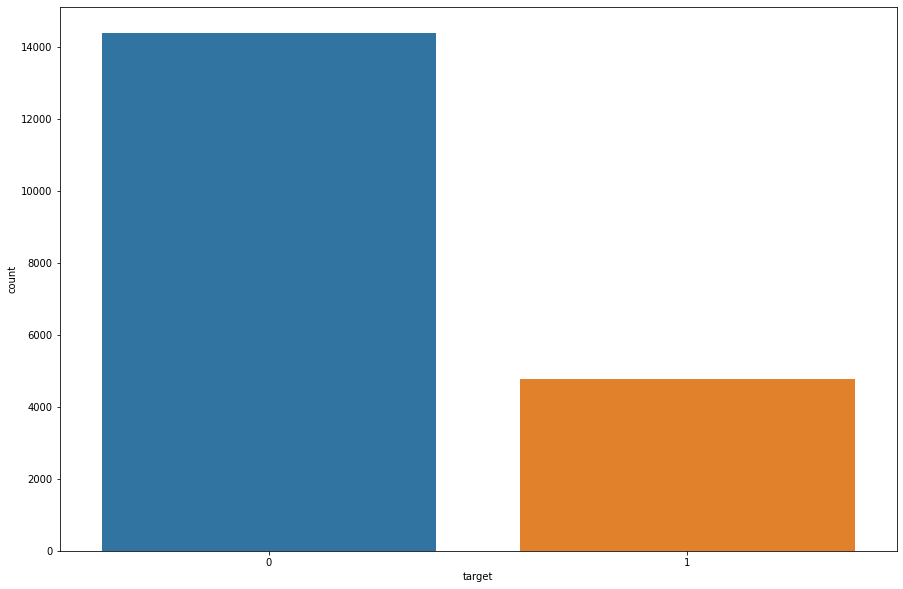

In [143]:
plt.figure(figsize=(15,10))
sns.countplot(x=y_train);

In [144]:
sm =SMOTE(random_state=17)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)
ad = ADASYN(random_state=17)
X_train_ad, y_train_ad = ad.fit_resample(X_train, y_train)

In [145]:
X_train.shape, X_train_sm.shape, X_train_ad.shape

((19158, 12), (28762, 12), (28188, 12))

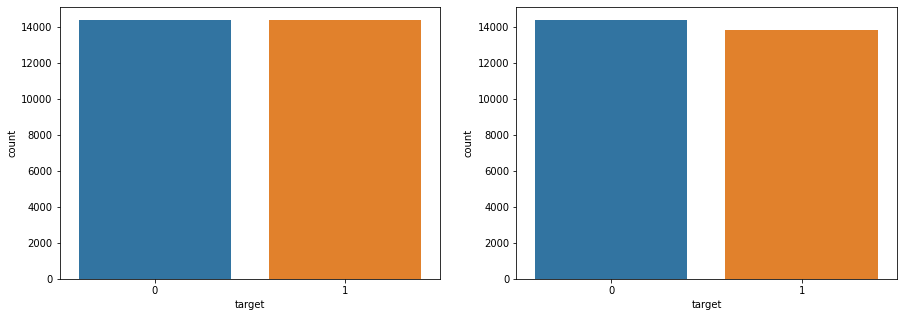

In [146]:
fig, ax =plt.subplots(1,2, figsize=(15,5))
sns.countplot(x=y_train_sm, ax=ax[0]);
sns.countplot(x=y_train_ad, ax=ax[1]);

Now having the same number of classes, let's try to train the model anew, with a new search for the best parameters

#### SMOTE

In [147]:
sm_gs = GridSearchCV(tree_clf, best_tree_param, cv=sf, n_jobs=-1, verbose=1)
sm_gs.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:   19.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(3, 7),
                         'min_samples_leaf': range(12, 21),
                         'min_samples_split': range(15, 28, 2)},
             verbose=1)

In [148]:
sm_best_tree = sm_gs.best_estimator_
sm_gs.best_params_

{'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 15}

In [149]:
sm_best_tree_pred = sm_best_tree.predict(X_test)
sm_best_tree_pred_proba = sm_best_tree.predict_proba(X_test)[:,1]

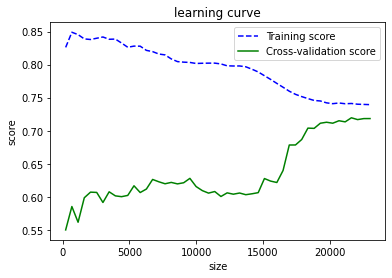

In [150]:
plot_learning_curve(sm_best_tree, X_train_sm, y_train_sm)

In [151]:
print(classification_report(y_test, best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1553
         1.0       0.63      0.44      0.52       576

    accuracy                           0.78      2129
   macro avg       0.72      0.67      0.69      2129
weighted avg       0.76      0.78      0.76      2129



In [152]:
print(classification_report(y_test, sm_best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1553
         1.0       0.50      0.61      0.55       576

    accuracy                           0.73      2129
   macro avg       0.67      0.69      0.68      2129
weighted avg       0.75      0.73      0.74      2129



As you can see, recall for class 1 has become higher

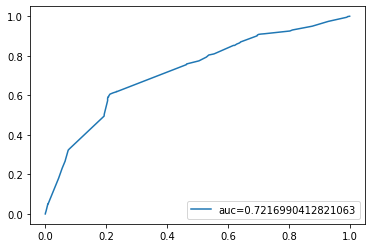

In [153]:
roc_curve_plot(y_test, sm_best_tree_pred_proba)

#### ADASYN

In [154]:
ad_gs = GridSearchCV(tree_clf, best_tree_param, cv=sf, n_jobs=-1, verbose=1)
ad_gs.fit(X_train_ad, y_train_ad)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:   18.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(3, 7),
                         'min_samples_leaf': range(12, 21),
                         'min_samples_split': range(15, 28, 2)},
             verbose=1)

In [155]:
ad_best_tree = ad_gs.best_estimator_
ad_gs.best_params_

{'max_depth': 6, 'min_samples_leaf': 14, 'min_samples_split': 15}

In [156]:
ad_best_tree_pred = ad_best_tree.predict(X_test)
ad_best_tree_pred_proba = ad_best_tree.predict_proba(X_test)[:,1]

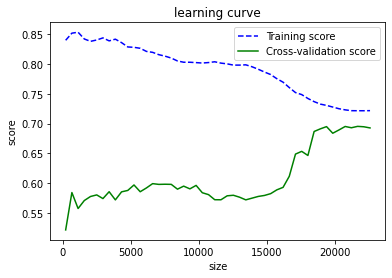

In [157]:
plot_learning_curve(ad_best_tree, X_train_ad, y_train_ad)

In [158]:
print(classification_report(y_test, best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1553
         1.0       0.63      0.44      0.52       576

    accuracy                           0.78      2129
   macro avg       0.72      0.67      0.69      2129
weighted avg       0.76      0.78      0.76      2129



In [159]:
print(classification_report(y_test, sm_best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      1553
         1.0       0.50      0.61      0.55       576

    accuracy                           0.73      2129
   macro avg       0.67      0.69      0.68      2129
weighted avg       0.75      0.73      0.74      2129



In [160]:
print(classification_report(y_test, ad_best_tree_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.75      0.80      1553
         1.0       0.49      0.62      0.55       576

    accuracy                           0.72      2129
   macro avg       0.66      0.69      0.67      2129
weighted avg       0.75      0.72      0.73      2129



ADASAN shows even higher recall results for class 1, but also decreases for class 0

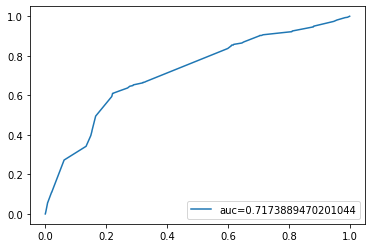

In [161]:
roc_curve_plot(y_test, ad_best_tree_pred_proba)

Now let's try to use Random forest as the main model

## Random forest

In [162]:
rs = RandomForestClassifier(random_state=17)

I will not use baseline, but will immediately perform hypertuning of the parameters

In [163]:
rs_param = tree_param.copy()
rs_param['n_estimators'] = range(100,2001, 100)
rs_param

{'max_depth': range(2, 20, 2),
 'min_samples_split': range(2, 52, 10),
 'min_samples_leaf': range(2, 20, 2),
 'n_estimators': range(100, 2001, 100)}

In [164]:
rs_rs = RandomizedSearchCV(rs, rs_param, cv=sf, n_jobs=-1, verbose=1, random_state=17)
rs_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                   estimator=RandomForestClassifier(random_state=17), n_jobs=-1,
                   param_distributions={'max_depth': range(2, 20, 2),
                                        'min_samples_leaf': range(2, 20, 2),
                                        'min_samples_split': range(2, 52, 10),
                                        'n_estimators': range(100, 2001, 100)},
                   random_state=17, verbose=1)

In [165]:
rs_rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 32,
 'min_samples_leaf': 14,
 'max_depth': 14}

In [166]:
best_rs = rs_rs.best_estimator_

random forest on GridSearchCV will take a very long time to learn, so I will not run it, we will leave these parameters as the best

In [167]:
rs_pred = best_rs.predict(X_test)
rs_pred_proba = best_rs.predict_proba(X_test)[:,1]

In [168]:
rs_feature = pd.DataFrame(best_rs.feature_importances_, index=X_train.columns,
                          columns=['result']).sort_values('result', ascending=False)
rs_feature

,result
city_development_index,0.413595
city,0.174216
experience,0.093617
training_hours,0.082245
relevent_experience,0.048053
enrolled_university,0.047601
company_size,0.038639
education_level,0.038467
last_new_job,0.032646
company_type,0.017364


Like Decision Trees, random forest considers city_development_index to be the main variable, but also added weight to the rest of the variables

In [169]:
print('Train:', best_rs.score(X_train, y_train),'\nTest: ',best_rs.score(X_test, y_test))

Train: 0.7981522079549014 
Test:  0.7792390793799906


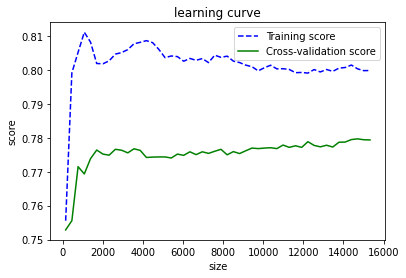

In [170]:
plot_learning_curve(best_rs, X_train, y_train)

We see a big gap between train store and cross score, and we also see that cross continues to grow as the size of the dataset increases

In [171]:
print(classification_report(y_test, rs_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1553
         1.0       0.63      0.44      0.52       576

    accuracy                           0.78      2129
   macro avg       0.72      0.67      0.69      2129
weighted avg       0.76      0.78      0.77      2129



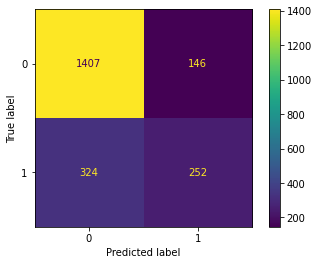

In [172]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rs_pred)).plot();

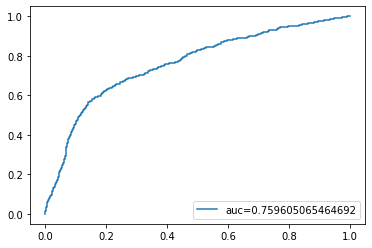

In [173]:
roc_curve_plot(y_test, rs_pred_proba)

Now let's try to use Resample data on random forest

## Random forest with resample methods

In [174]:
sm_rs = best_rs.fit(X_train_sm, y_train_sm)
ad_rs = best_rs.fit(X_train_sm, y_train_sm)

In [175]:
sm_rs_pred = sm_rs.predict(X_test)
sm_rs_pred_proba = sm_rs.predict_proba(X_test)[:,1]

ad_rs_pred = ad_rs.predict(X_test)
ad_rs_pred_proba = ad_rs.predict_proba(X_test)[:,1]

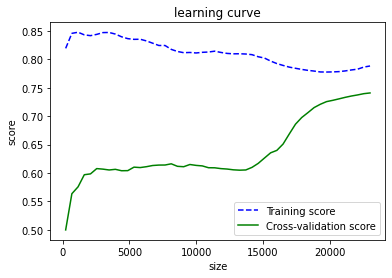

In [176]:
plot_learning_curve(best_rs, X_train_sm, y_train_sm)

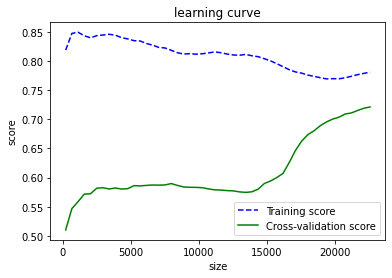

In [177]:
plot_learning_curve(best_rs, X_train_ad, y_train_ad)

In [178]:
print(classification_report(y_test, sm_rs_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      1553
         1.0       0.52      0.60      0.56       576

    accuracy                           0.74      2129
   macro avg       0.68      0.70      0.69      2129
weighted avg       0.76      0.74      0.75      2129



In [179]:
print(classification_report(y_test, ad_rs_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      1553
         1.0       0.52      0.60      0.56       576

    accuracy                           0.74      2129
   macro avg       0.68      0.70      0.69      2129
weighted avg       0.76      0.74      0.75      2129



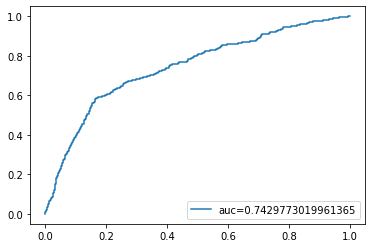

In [180]:
roc_curve_plot(y_test, sm_rs_pred_proba)

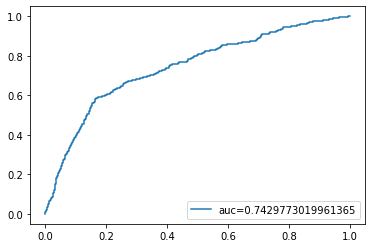

In [181]:
roc_curve_plot(y_test, ad_rs_pred_proba)

In [182]:
final_result = pd.DataFrame([['Decision Tree', roc_auc_score(y_test, tree_pred_proba)],
              ['Decision Tree tuning', roc_auc_score(y_test, best_tree_pred_proba)],
              ['Decision Tree tuning with SMOTE', roc_auc_score(y_test, sm_best_tree_pred_proba)],
              ['Decision Tree tuning with ADASYN', roc_auc_score(y_test, ad_best_tree_pred_proba)],
              ['Random forest', roc_auc_score(y_test, rs_pred_proba)],
              ['Random forest tuning with SMOTE', roc_auc_score(y_test, sm_rs_pred_proba)],
              ['Random forest tuning with ADASYN', roc_auc_score(y_test, ad_rs_pred_proba)]],            
             columns=['method', 'result']).sort_values('result', ascending=False)

In [183]:
final_result

,method,result
4,Random forest,0.759605
5,Random forest tuning with SMOTE,0.742977
6,Random forest tuning with ADASYN,0.742977
1,Decision Tree tuning,0.722883
2,Decision Tree tuning with SMOTE,0.721699
3,Decision Tree tuning with ADASYN,0.717389
0,Decision Tree,0.605163


# Thank you for watching it's my project, I will be grateful if you give feedback on my work in comments. I want to improve my skills and if you find mistakes in work, tell me about it, please.